# Unveiling the Android App Market: Analyzing Google Play Store Data 

THIS DATA CONTAIN TWO DATASETS i.e, user_reviews.csv which  containscontains 100 reviews for each app. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity, and Sentiment Subjectivity and
 Apps.csv which contain all the details of the applications on Google Play. There are several features that describe a given app.I need to clean ,categorize and visualize this data to understand the app market dynamics and to gain insights .



In [2]:
#IMPORTING SUITABLE REQUIRED LIBRARIES TO CLEAN ,CATEGORIZED ,AND VISUALIZE GOOGLE PLAY STORE DATA TO UNDERSTAND APP MARKET DYNAMICS.
import pandas as pd           
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob



pandas- It will provide powerful data analysis and manipulation library for Python.

numpy- It will provides efficient array and mathematical operations for numerical computing.

matplotlib- It will creates various static visualizations like line plots, scatter plots, and histograms.

seaborn- Built on top of matplotlib, offer a high-level interface for creating attractive and informative statistical graphics.

plotly.express- Enables creation of interactive visualizations like charts, graphs, and maps using Plotly.

plotly.graph_objects- Provides lower-level building blocks for creating custom interactive Plotly figures.

TextBlob- It is designed to simplify Natural Language Processing (NLP) tasks. It offers an easy-to-use interface for various functionalities

In [3]:
df1=pd.read_csv("C:/Users/sahak/Downloads/internship/user_reviews.csv/user_reviews.csv")
df1


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


To check the data types of each of the column's and presense of null values. As seen the sentiment_Polarity and Sentiment Subjectivity have data type as float so i will convert it into integer data type for gain the accurate value for better visualization.

In [5]:
#Cleaning the dataset 
df1.dropna(inplace=True)
df1



,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [6]:
# Distribution of categories 
category_counts=df1['App'].value_counts()
category_counts

num_categories = df1['App'].nunique()
print('Count of categories = ', num_categories)




Count of categories =  865


In [12]:
# Count the number of apps in each 'Category'. 
num_apps_in_category = df1['App'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

sorted_num_apps_in_category

Bowmasters                        312
Angry Birds Classic               273
Helix Jump                        273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Caller ID +                         1
All-in-One Mahjong 3 FREE           1
DashClock Widget                    1
Free Live Talk-Video Call           1
Best Fiends - Free Puzzle Game      1
Name: App, Length: 865, dtype: int64

In [10]:
sentiment_counts=df1['Sentiment'].value_counts()
sentiment_counts

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x1d1e69efaf0>,
 [Text(-0.3021776156028413, -1.1613305681969204, 'Positive'),
  Text(0.6980790573050398, 0.8501091869590088, 'Negative'),
  Text(-0.5533758605764296, 1.176339728535637, 'Neutral')],
 [Text(-0.17627027576832405, -0.6774428314482035, '64.1%'),
  Text(0.38077039489365805, 0.4636959201594593, '22.1%'),
  Text(-0.3405389911239567, 0.7239013714065459, '13.8%')])

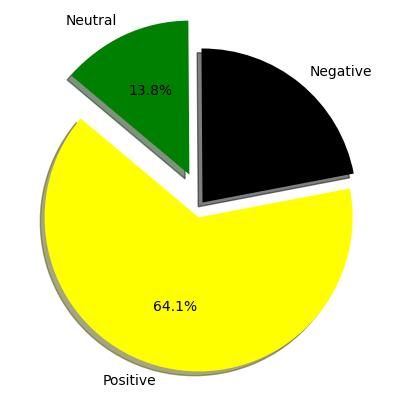

In [11]:

labels=['Positive','Negative','Neutral']
sizes=[23998,8271,5158]
colors=['yellow','black','green']
explode = (0.1,0.0,0.2)
plt.figure(figsize=(5,5))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)



In [16]:
# Define functions to compute sentiment polarity and subjectivity
def get_sentiment_polarity(review):
    return TextBlob(review).sentiment.polarity

def get_sentiment_subjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# Apply the functions to compute polarity and subjectivity
df1['Sentiment_Polarity'] = df1['Translated_Review'].apply(get_sentiment_polarity)
df1['Sentiment_Subjectivity'] = df1['Translated_Review'].apply(get_sentiment_subjectivity)

# Classify the sentiment based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df1['Sentiment'] = df1['Sentiment_Polarity'].apply(classify_sentiment)

print(df1)



                                  App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
5               10 Best Foods for You   
...                               ...   
64222  Housing-Real Estate & Property   
64223  Housing-Real Estate & Property   
64226  Housing-Real Estate & Property   
64227  Housing-Real Estate & Property   
64230  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
5                                               Best way  Positive   
...                                                  ...       ...   
64222  Most ads o

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64


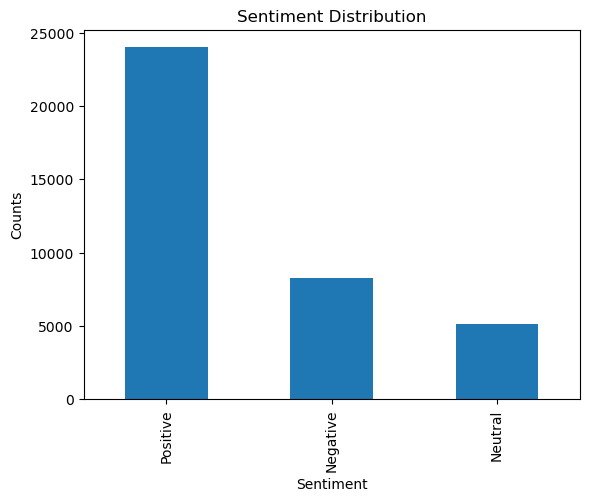

In [51]:

sentiment_counts = df1['Sentiment'].value_counts()
print(sentiment_counts)

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [15]:
# Summary statistics for sentiment polarity and subjectivity
summary_stats = df1[['Sentiment_Polarity', 'Sentiment_Subjectivity']].describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
        Sentiment_Polarity  Sentiment_Subjectivity
count        37427.000000            37427.000000
mean             0.182171                0.492770
std              0.351318                0.259904
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000


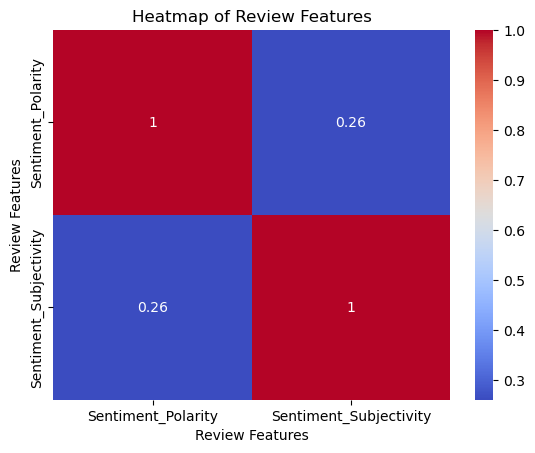

In [16]:
correlation_matrix = df1[['Sentiment_Polarity', 'Sentiment_Subjectivity']].corr()

# Generate a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Adjust 'cmap' for color scheme

# Customize the plot (optional)
plt.title('Heatmap of Review Features')
plt.xlabel('Review Features')
plt.ylabel('Review Features')
plt.show()

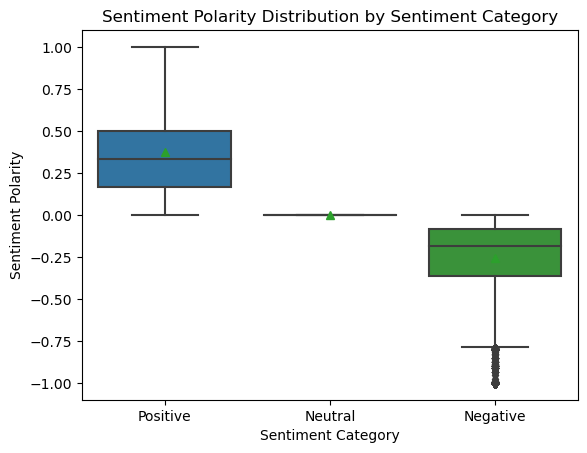

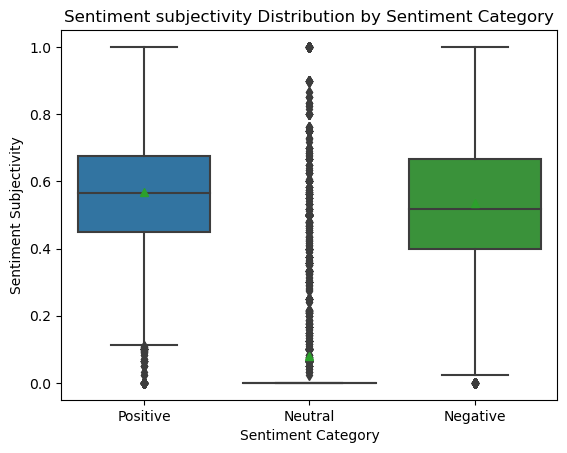

In [17]:
sns.boxplot(
    x="Sentiment",
    y="Sentiment_Polarity",
    showmeans=True,
    data=df1
)
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity Distribution by Sentiment Category')
plt.show()


sns.boxplot(
    x="Sentiment",
    y="Sentiment_Subjectivity",
    showmeans=True,
    data=df1
)
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment subjectivity Distribution by Sentiment Category')
plt.show()



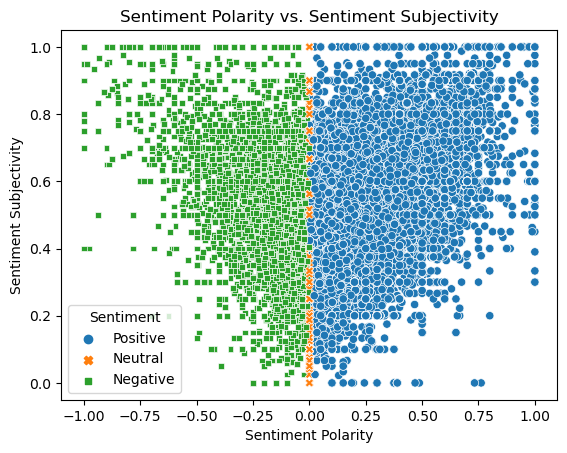

In [18]:
sns.scatterplot(
    x="Sentiment_Polarity",
    y="Sentiment_Subjectivity",
    hue="Sentiment",
    data=df1,
    style="Sentiment"  # This creates markers with different shapes for each sentiment
)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Polarity vs. Sentiment Subjectivity')
plt.show()

 DATASET 2

In [18]:
df2=pd.read_csv("C:/Users/sahak/Downloads/internship/apps.csv/apps.csv")
df2

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [19]:
app = df2.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ',app['App'].value_counts().sum())

# Have a look at a random sample of 5 rows
print(app.head(10))

Total number of apps in the dataset =  9659
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   
5           5                         Paper flowers instructions   
6           6            Smoke Effect Photo Maker - Smoke Editor   
7           7                                   Infinite Painter   
8           8                               Garden Coloring Book   
9           9                      Kids Paint Free - Drawing Fun   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   


In [20]:
chars_to_remove = ['+',',','$']
cols_to_clean = ['Installs','Price']

df2.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
num_categories = len(df2['Category'].unique())
print('Number of categories = ', num_categories)

#Types of categories
type_categories = len(df2['Type'].unique())
print(' Type categories = ', num_categories)

type_counts=df2['Type'].value_counts()
type_counts

#content ratings
content_ratings = len(df2['Content Rating'].unique())
print(' Content  ratings = ', num_categories)

content_counts=df2['Content Rating'].value_counts()
content_counts

Number of categories =  33
 Type categories =  33
 Content  ratings =  33


Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x2117cade940>,
 [Text(0.703843441151814, -0.9719076141010385, 'Free'),
  Text(-0.7624971598274004, 1.0528998438859927, 'Paid')],
 [Text(0.41057534067189144, -0.5669461082256058, '92.2%'),
  Text(-0.4692290214322463, 0.6479383654683032, '7.8%')])

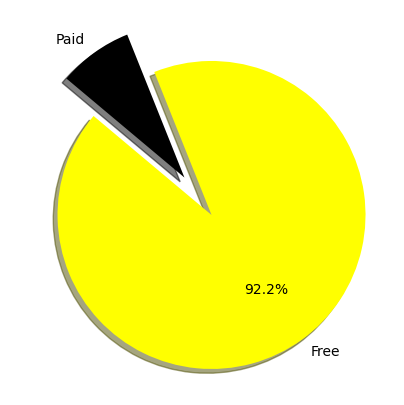

In [22]:
labels=['Free','Paid']
sizes=[8903,756]
colors=['yellow','black']
explode = (0.1,0.2)
plt.figure(figsize=(5,5))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)



In [23]:
print("Average Rating:", df2["Rating"].mean())
print("Number of Apps with Reviews:", len(df2[df2["Reviews"] > 0]))
print("Distribution of Installs:", df2["Installs"].describe()) 

Average Rating: 4.173243045387998
Number of Apps with Reviews: 9066
Distribution of Installs: count           9659
unique            21
top       1,000,000+
freq            1417
Name: Installs, dtype: object


In [24]:
df2['Reviews'] = df2['Reviews'].astype(float)
df2['Reviews']

0          159.0
1          967.0
2        87510.0
3       215644.0
4          967.0
          ...   
9654        38.0
9655         4.0
9656         3.0
9657       114.0
9658    398307.0
Name: Reviews, Length: 9659, dtype: float64

In [27]:
def get_sentiment_from_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif rating >= 2:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to the review column
df2['Sentiment'] = df2['Reviews'].apply(get_sentiment_from_rating)

Positive    8411
Negative     865
Neutral      383
Name: Sentiment, dtype: int64


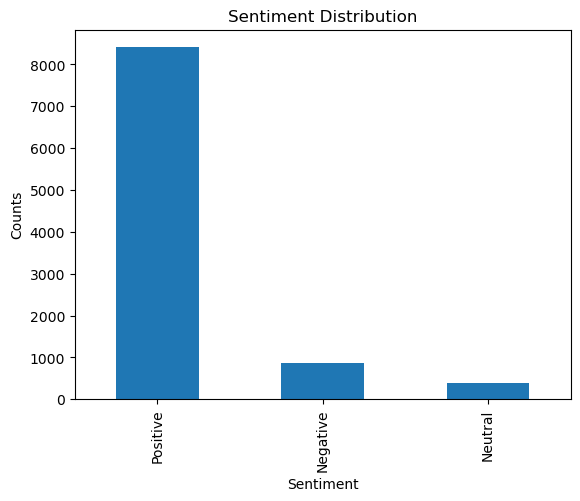

In [26]:
# Display the sentiment distribution
sentiment_counts = df2['Sentiment'].value_counts()
print(sentiment_counts)

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

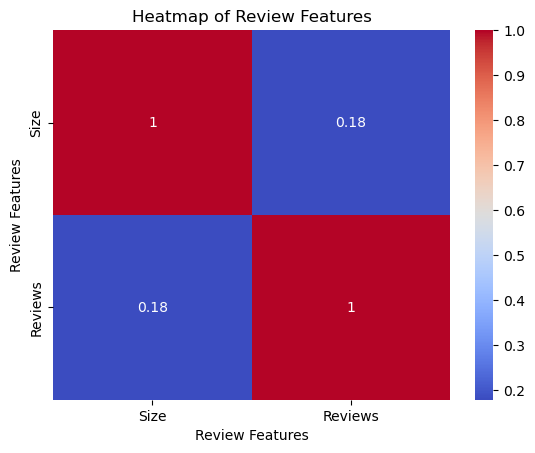

In [76]:
correlation_matrix = df2[['Size', 'Reviews']].corr()

# Generate a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Adjust 'cmap' for color scheme

# Customize the plot 
plt.title('Heatmap of Review Features')
plt.xlabel('Review Features')
plt.ylabel('Review Features')
plt.show()

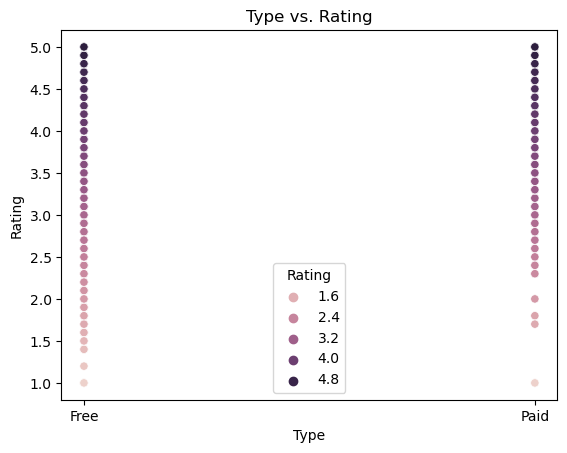

In [77]:
sns.scatterplot(
    x="Type",
    y="Rating",
    hue="Rating",
    data=df2,
      
)
plt.xlabel('Type')
plt.ylabel('Rating')
plt.title('Type vs. Rating')
plt.show()

In [29]:
trace_paid = go.Scatter(
    x=app[app['Type'] == 'Paid'].index,  # Use index for x-axis (app names?)
    y=app[app['Type'] == 'Paid']['Installs'],
    mode='markers',  # Set marker mode for points
    name='Paid'
)

trace_free = go.Scatter(
    x=app[app['Type'] == 'Free'].index,  # Use index for x-axis (app names?)
    y=app[app['Type'] == 'Free']['Installs'],
    mode='markers',  # Set marker mode for points
    name='Free'
)

layout = go.Layout(
    title="Number of downloads of paid apps vs. free apps",
    xaxis=dict(title="App Name (or any other relevant identifier)"),  # Adjust x-axis title
    yaxis=dict(title="Number of Installs")
)

# Create the figure and add traces
fig = go.Figure(data=[trace_paid, trace_free], layout=layout)
# Display the plot
fig.show()